In [4]:
import numpy as np
import pandas as pd

# load the sarcoma transcriptome data
sarcoma_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-zscore-no-label.csv')
sarcoma_df.shape

(206, 20605)

In [5]:
sarcoma_labels_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-labels-only.csv')
sarcoma_labels_df.shape

(206, 1)

In [6]:
# Convert transriptome df to np array
X = sarcoma_df.to_numpy()
print(X)

[[-0.51154087  0.09480786 -0.35176093 ...  0.51624723  0.02346097
   2.48359169]
 [-0.19129576  0.15347405  0.20261954 ... -0.41028013  2.86123234
   0.16777757]
 [ 0.26472818  2.327348   -0.56049386 ... -0.21651268  0.0192731
   0.76332633]
 ...
 [ 0.24931652 -0.03363532 -0.97441342 ... -0.50605902 -1.23871739
   0.28153212]
 [ 0.2581943  -0.8373263  -0.19647611 ... -0.29302061 -0.78367962
  -0.7597076 ]
 [-0.07085013 -0.29522455 -0.59015045 ... -0.50644652 -0.01137879
  -0.39862195]]


In [7]:
# Convert label df to np array
y_df = sarcoma_labels_df['label']
y = y_df.to_numpy()
print(y)

[4 2 2 1 5 3 2 4 4 3 4 4 4 3 0 3 1 4 2 4 4 0 2 4 3 3 3 2 0 4 4 5 3 3 2 4 4
 5 4 3 4 4 5 4 2 4 4 4 1 4 1 4 4 2 4 3 3 2 2 4 4 4 4 4 4 4 2 2 3 4 2 3 4 4
 3 4 3 2 4 3 2 3 4 4 3 4 3 4 3 4 4 1 3 4 4 4 0 4 3 4 3 3 3 5 2 0 3 3 1 1 4
 2 3 0 3 4 2 4 2 0 3 4 4 3 2 2 1 3 4 4 4 4 4 3 2 4 2 4 1 0 2 2 3 4 4 2 3 4
 4 3 1 3 4 3 4 2 2 1 3 2 2 0 4 2 1 4 2 1 4 3 3 4 2 4 2 4 3 4 2 1 3 4 2 4 4
 2 2 3 4 4 4 3 2 4 1 1 2 3 0 3 3 2 2 3 1 2]


In [8]:
# For t-SNE analysis a perplexity of 60 and an angle of 0.5 (default - used with Barnes-Hut T-SNE) were used. 
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=60, angle=0.5).fit_transform(X)
# X_embedded = TSNE(n_components=200, perplexity=60, method="exact").fit_transform(X)
X_embedded.shape

(206, 2)

In [9]:
# concatenate the components with the label and then get the mean of each component grouped by label
sarcoma_tsne_df = pd.DataFrame(X_embedded) 
components_labels_df = pd.merge(sarcoma_tsne_df, sarcoma_labels_df, right_index=True, left_index=True)
components_labels_df.columns = ['comp1','comp2','label']
components_labels_df

,comp1,comp2,label
0,-2.044162,-0.698508,4
1,2.707274,-3.209725,2
2,4.010680,-3.049489,2
3,2.111965,1.105205,1
4,0.714024,-4.678055,5
...,...,...,...
201,2.794348,-1.708138,2
202,3.306505,-1.784921,2
203,6.430726,-1.510255,3
204,2.738297,0.816103,1


In [10]:
sarcoma_histo_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-labels-histo.csv')
sarcoma_histo_df.head

<bound method NDFrame.head of      label short histo
0        4         LMS
1        2         UPS
2        2         UPS
3        1         MFS
4        5       MPNST
..     ...         ...
201      2         UPS
202      2         UPS
203      3       DDLPS
204      1         MFS
205      2         UPS

[206 rows x 2 columns]>

In [11]:
df = pd.concat([components_labels_df, sarcoma_histo_df['short histo']], axis=1)
print(df)

        comp1     comp2  label short histo
0   -2.044162 -0.698508      4         LMS
1    2.707274 -3.209725      2         UPS
2    4.010680 -3.049489      2         UPS
3    2.111965  1.105205      1         MFS
4    0.714024 -4.678055      5       MPNST
..        ...       ...    ...         ...
201  2.794348 -1.708138      2         UPS
202  3.306505 -1.784921      2         UPS
203  6.430726 -1.510255      3       DDLPS
204  2.738297  0.816103      1         MFS
205  2.280553 -1.646911      2         UPS

[206 rows x 4 columns]


In [15]:
# groupby the label and take the mean of each component
grouped_labels = df.groupby('short histo')   

comp1_label_mean = grouped_labels['comp1'].mean()
comp2_label_mean = grouped_labels['comp2'].mean()

#comp1_mean = grouped_labels['comp1'].mean().reset_index
#comp2_mean = grouped_labels['comp2'].mean().reset_index


print(comp1_label_mean)
print(comp2_label_mean)

short histo
DDLPS    3.712120
LMS     -1.282786
MFS      3.261610
MPNST    0.202957
SS       3.032709
UPS      3.341476
Name: comp1, dtype: float32
short histo
DDLPS    0.154690
LMS     -0.475945
MFS     -1.011569
MPNST    0.729395
SS       4.155985
UPS     -1.180273
Name: comp2, dtype: float32


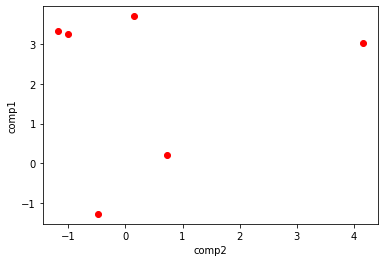

In [19]:
# plot the groupings
import matplotlib.pyplot as plt
plt.plot(comp2_label_mean, comp1_label_mean, 'ro')
plt.ylabel('comp1')
plt.xlabel('comp2')
 
plt.show()

In [27]:
dfm = df.groupby('short histo').mean()

In [29]:
for r in dfm:
    print(r)

comp1
comp2
label


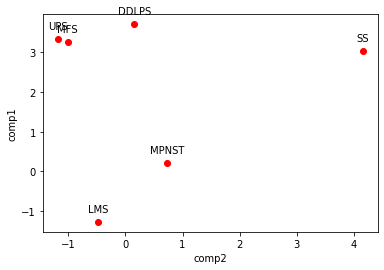

In [31]:
# figure out how to add types to each point
import matplotlib.pyplot as plt
plt.plot(comp2_label_mean, comp1_label_mean, 'ro')
plt.ylabel('comp1')
plt.xlabel('comp2')
# zip joins x and y coordinates in pairs
for label, row in df.groupby('short histo').mean().iterrows():

    plt.annotate(label, # this is the text
                 (row['comp2'],row['comp1']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [11]:
components_labels_df.to_csv("../Data/sarcoma-gene-exp-FPKM-tsne2.csv", index=False)